In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
import pandas as pd
%matplotlib inline

## 0. Calibrate MCA Channels to sources of known emission energy

In [2]:
#List K_alpha then K_beta
CuPeaks = np.array([104.6, 115.9]) #Channel Number of photopeak
CuEnergy = np.array([8.038, 8.905]) #Accepted value of emission energy in kev

In [3]:
NiPeaks = np.array([97.33, 107.53])
NiEnergy = np.array([7.469, 8.261])

In [4]:
ZnPeaks = np.array([112.34, 124.45])
ZnEnergy = np.array([8.627, 9.572])

In [5]:
ZrPeaks = np.array([204.6, 229.62])
ZrEnergy = np.array([15.733, 17.818])

In [6]:
MoPeaks = np.array([226.71, 254.83])
MoEnergy = np.array([17.427, 19.786])

In [7]:
RhPeaks = np.array([261.83, 290.90])
RhEnergy = np.array([20.145, 22.948])

In [8]:
Peaks = np.hstack([CuPeaks, NiPeaks, ZnPeaks, ZrPeaks, MoPeaks, RhPeaks])

In [9]:
Energy = np.hstack([CuEnergy, NiEnergy, ZnEnergy, ZrEnergy, MoEnergy, RhEnergy])

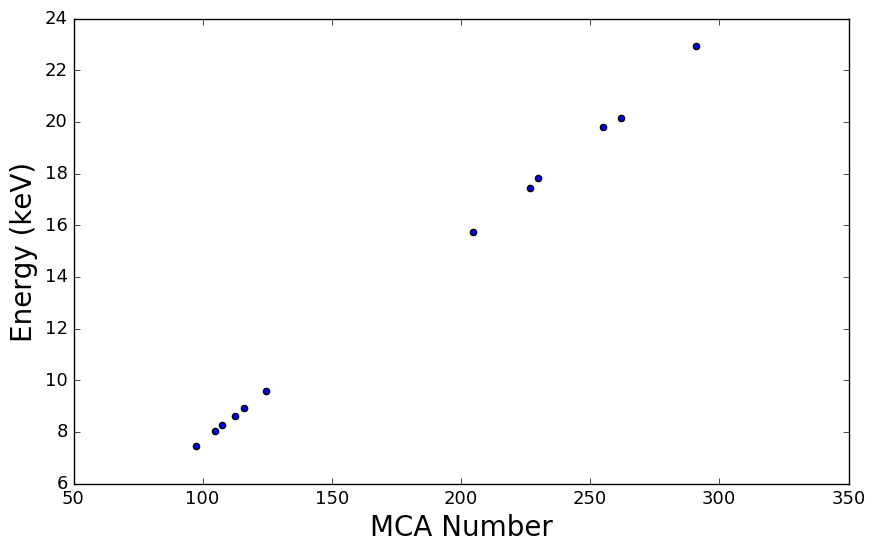

In [10]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);

plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

In [11]:
def myfun(N,a,b,c):
    ans = a + b*N + c*N**2  # this is y, "the function to be fit"
    return ans

In [12]:
p0 = [-2,1,0]

In [13]:
xlots = np.linspace(80,320)  # need lots of data points for smooth curve
yfit = np.zeros((len(Peaks),xlots.size))

plsq, pcov = curve_fit(myfun, Peaks, Energy, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
da = np.sqrt(pcov[0,0])
b = plsq[1]
db = np.sqrt(pcov[1,1])
c = plsq[2]
dc = np.sqrt(pcov[2,2])

yfit = myfun(xlots,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.7f +/- %.7f' % (plsq[2], np.sqrt(pcov[2,2])))

a = 0.7602590 +/- 0.3077695
b = 0.0662655 +/- 0.0037933
c = 0.0000329 +/- 0.0000102


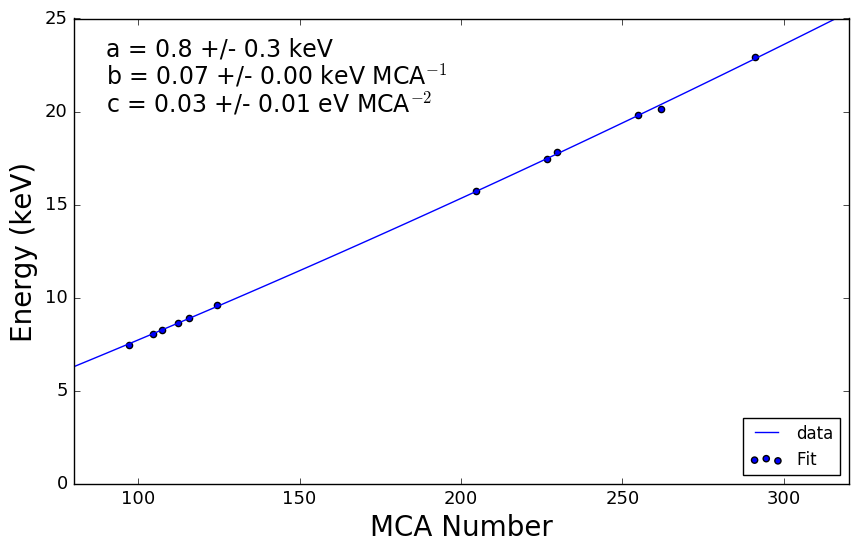

In [14]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);
plt.xlim(80,320)
plt.ylim(0,25)
plt.plot(xlots,yfit);
plt.legend(['data','Fit'],loc='lower right');
plt.text(90,23,'a = %.1f +/- %.1f keV' % (plsq[0], np.sqrt(pcov[0,0])),size=17)
plt.text(90,21.5,'b = %.2f +/- %.2f keV MCA$^{-1}$' % (plsq[1], np.sqrt(pcov[1,1])),size=17)
plt.text(90,20,'c = %.2f +/- %.2f eV MCA$^{-2}$' % (plsq[2]*1e3, np.sqrt(pcov[2,2])*1e3),size=17)
plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.savefig('LinearMCAFit')

## Identification

In [15]:
#Uncertainty
N = np.array([104.6, 115.9, 97.33, 107.53, 112.34, 124.45, 204.6, 229.62, 226.71, 254.83, 261.83, 290.90]) #Photopeak channel of K rays
dN = np.array([3]*len(N)) #Uncertainty in channel number

In [16]:
def deltaE(N,dN):
    dbN = np.sqrt((db/b)**2 + (dN/N)**2)*(b*N)

    dcN2 = np.sqrt((dc/c)**2 + 4*(dN/N)**2)*(c*N**2)

    dEMeas = np.sqrt(da**2 + dbN**2 + dcN2**2)
    
    return dEMeas

In [17]:
deltaE(N,dN)

array([ 0.55185031,  0.58889549,  0.52938117,  0.56121256,  0.57695349,
        0.61856436,  0.95930733,  1.08801537,  1.07249877,  1.22852729,
        1.26949499,  1.44884195])

In [18]:
#Tin
TinPeaks = np.array([326.71, 369.09]);
TinEnergies = myfun(TinPeaks,a,b,c);
TinEnergies
Tin_dE = deltaE(TinPeaks,[4,4])
Tin_dE

array([ 1.70056326,  2.01558791])

In [19]:
#Lead
LeadPeaks = np.array([119.76, 191.94, 123.5, 148.18, 196.5]);
LeadEnergies = myfun(LeadPeaks,a,b,c);
LeadEnergies
Lead_dE = deltaE(LeadPeaks,[4]*len(LeadPeaks))
Lead_dE

array([ 0.62747187,  0.91577805,  0.64005657,  0.72975143,  0.93709355])

In [20]:
#Brass
BrassPeaks = np.array([104.64, 112.92]);
BrassEnergies = myfun(BrassPeaks,a,b,c);
BrassEnergies
Brass_dE = deltaE(BrassPeaks,[4]*len(BrassPeaks))
Brass_dE

array([ 0.57943866,  0.60516948])

In [21]:
#Ssteel
StainlessSteelPeaks = np.array([70.36, 77.37, 83.29, 81.61, 97.43, 109]);
StainlessSteelEnergies = myfun(StainlessSteelPeaks,a,b,c);
StainlessSteelEnergies
StainlessSteel_dE = deltaE(StainlessSteelPeaks,[4]*len(StainlessSteelPeaks))
StainlessSteel_dE

array([ 0.4889818 ,  0.50522557,  0.51988596,  0.51563999,  0.55820258,
        0.59281205])

In [22]:
#Gsteel
GalvSteelPeaks = np.array([83, 112.27, 124.47]);
GalvSteelEnergies = myfun(GalvSteelPeaks,a,b,c);
GalvSteelEnergies
GalvSteel_dE = deltaE(GalvSteelPeaks,[4]*len(GalvSteelPeaks))
GalvSteel_dE

array([ 0.51914824,  0.60309882,  0.6433649 ])

In [23]:
#Unknown K1
K1Peaks = np.array([126.17, 149.14, 173.88]);
K1Energies = myfun(K1Peaks,a,b,c);
K1Energies
K1_dE = deltaE(K1Peaks,[4]*len(K1Peaks))
K1_dE

array([ 0.64920679,  0.73346756,  0.83491803])

In [24]:
#Unknown K2
K2Peaks = np.array([286.66]);
K2Energies = myfun(K2Peaks,a,b,c);
K2Energies
K2_dE = deltaE(K2Peaks,[4]*len(K2Peaks))
K2_dE

array([ 1.43339151])

In [25]:
#Penny
PennyPeaks = np.array([104.57, 112.62]);
PennyEnergies = myfun(PennyPeaks,a,b,c);
PennyEnergies
Penny_dE = deltaE(PennyPeaks,[4]*len(PennyPeaks))
Penny_dE

array([ 0.57922718,  0.60421272])

In [26]:
#Quarter
QuarterPeaks = np.array([97.39, 104.72]);
QuarterEnergies = myfun(QuarterPeaks,a,b,c);
QuarterEnergies
Quarter_dE = deltaE(QuarterPeaks,[4]*len(QuarterPeaks))
Quarter_dE

array([ 0.55808788,  0.57968048])

In [27]:
#Silver
SilverPeaks = np.array([286.9, 323.6]);
SilverEnergies = myfun(SilverPeaks,a,b,c);
SilverEnergies
Silver_dE = deltaE(SilverPeaks,[4]*len(QuarterPeaks))
Silver_dE

array([ 1.4349055 ,  1.67876263])

### Plot Stainless Steel Data

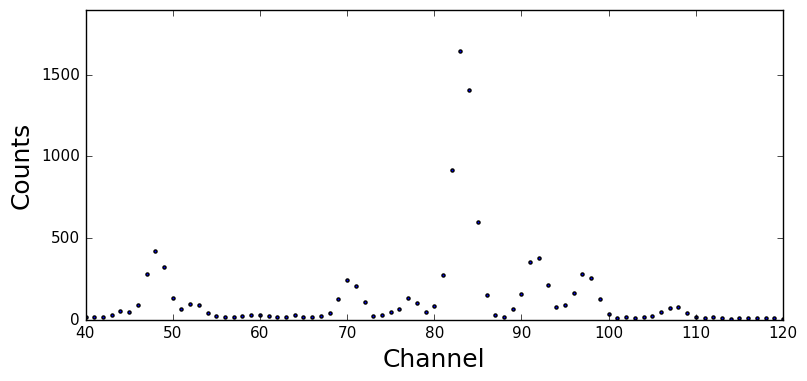

In [28]:
StainlessSteel = np.loadtxt('StainlessSteel.csv')
Channels = np.arange(0,512)

plt.figure(figsize=(9,4))
plt.scatter(Channels, StainlessSteel,marker = '.');
#ax = plt.gca()
#ax.set_yscale('log')
plt.xlim(40,120);
plt.ylim(0,1900);
plt.xlabel('Channel',size=18);
plt.ylabel('Counts',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('StainlessSteelCropped.png')

### Plot Background

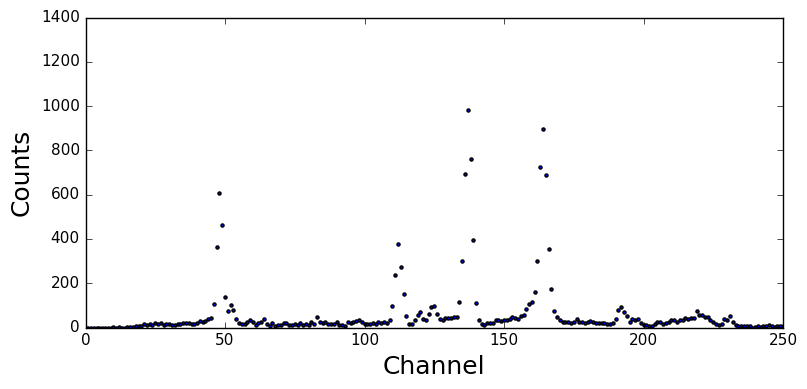

In [29]:
Background = np.loadtxt('Background.csv')
Channels = np.arange(0,512)

plt.figure(figsize=(9,4))
plt.scatter(Channels, Background,marker = '.');
#ax = plt.gca()
#ax.set_yscale('log')
plt.xlim(0,250);
plt.ylim(0,1400)
plt.xlabel('Channel',size=18);
plt.ylabel('Counts',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('BackgroundCropped.png')

### Plot GSteel

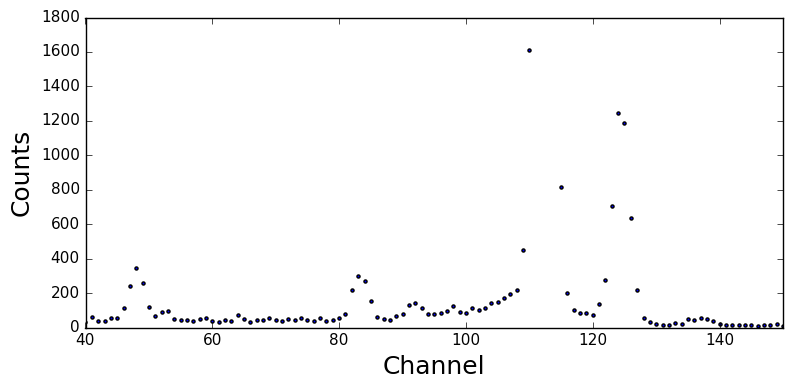

In [30]:
GSteel = np.loadtxt('GSteel.csv')
Channels = np.arange(0,512)

plt.figure(figsize=(9,4))
plt.scatter(Channels, GSteel,marker = '.');
#ax = plt.gca()
#ax.set_yscale('log')
plt.xlim(40,150);
plt.ylim(0,1800)
plt.xlabel('Channel',size=18);
plt.ylabel('Counts',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('GSteelCropped.png')

# Moseley's Law

In [31]:
#K alpha energies for all samples. Lead is the first entry
KaE = np.array([6.397, CuEnergy[0], NiEnergy[0], ZnEnergy[0], ZrEnergy[0], MoEnergy[0], RhEnergy[0]]);
KaE

sqrtKaE = np.array([np.sqrt(entry) for entry in KaE])

In [32]:
#Z value for all samples above
KaZ = np.array([26, 29, 28, 30, 40, 42, 45 ])

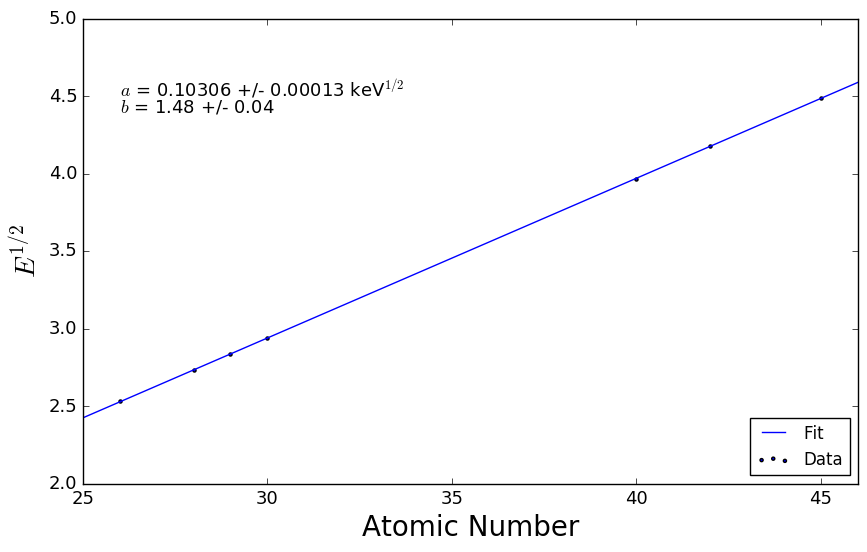

In [33]:
def myfun(Z,a,b):
    ans =  a*(Z-b)
    return ans

p0 = [0.1, 1] #guess

xspace = np.linspace(25,46) 

plsq, pcov = curve_fit(myfun, KaZ, sqrtKaE, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
ea = np.sqrt(pcov[0,0])
b = plsq[1]
eb = np.sqrt(pcov[1,1])

yfit = myfun(xspace,plsq[0],plsq[1])  # use fit results for a, b, c

plt.figure(figsize=(10,6));


plt.scatter(KaZ,sqrtKaE,marker='.',label='Data');
plt.plot(xspace,yfit,label='Fit')
plt.legend(loc='lower right')
plt.xlabel('Atomic Number',fontsize=20);
plt.ylabel('$E^{1/2}$',fontsize = 20);
plt.text(26,4.5,'$a$ = %.5f +/- %.5f keV$^{1/2}$' % (plsq[0], np.sqrt(pcov[0,0])),size=13)
plt.text(26,4.4,'$b$ = %.2f +/- %.2f ' % (plsq[1], np.sqrt(pcov[1,1])),size=13)
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(25,46);
plt.savefig('Moseley.png')